# <font color = 'blue'> Life Expectancy and GDP

## 1. Project Goal

The this project, I will analyze data on GDP and life expectancy from the World Health Organization and the World Bank to try and identify the relationship between the GDP and life expectancy of six countries! 

In [30]:
#import modules 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats

## 2. Dataset
I will be exploring the dataset to discover any clues that can lead to interesting anlysis

In [31]:
#import the dataset into a dateframe
life_gdp = pd.read_csv('all_data.csv')

#display the dataset
life_gdp

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10
...,...,...,...,...
91,Zimbabwe,2011,54.9,1.209845e+10
92,Zimbabwe,2012,56.6,1.424249e+10
93,Zimbabwe,2013,58.0,1.545177e+10
94,Zimbabwe,2014,59.2,1.589105e+10


In [32]:
#get a concise summary of the dataset
life_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [33]:
#generate descriptive statistics 
life_gdp.describe()

,Year,Life expectancy at birth (years),GDP
count,96.000000,96.000000,9.600000e+01
mean,2007.500000,72.789583,3.880499e+12
std,4.633971,10.672882,5.197561e+12
min,2000.000000,44.300000,4.415703e+09
25%,2003.750000,74.475000,1.733018e+11
50%,2007.500000,76.750000,1.280220e+12
75%,2011.250000,78.900000,4.067510e+12
max,2015.000000,81.000000,1.810000e+13


Let's look into each column a little deeper

### a. Country

In [34]:
#find unique values of the column: Country
countries = life_gdp['Country'].unique()
print('There are six countries: {}'.format(countries))

There are six countries: ['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']


### b. Year

In [35]:
#find unique values of the columns: Year
year = life_gdp['Year'].unique()
print('The dataset ranges from {} to {}'.format(year[0],year[-1]))

The dataset ranges from 2000 to 2015


## c. Life expectancy at birth (years)

In [36]:
#display the life expectancy column
life_gdp.['Life expectancy at brith (years)']
print('It is pretty hard to type the column name correctly. I will rename it ')

SyntaxError: invalid syntax (<ipython-input-36-b8104ee5502e>, line 2)

In [37]:
#rename the column for life expectancy
life_gdp.rename(columns = {"Life expectancy at birth (years)" : 'Life_expectancy'},inplace = True)

In [38]:
#disply the column again
life_gdp['Life_expectancy']

0     77.3
1     77.3
2     77.8
3     77.9
4     78.0
      ... 
91    54.9
92    56.6
93    58.0
94    59.2
95    60.7
Name: Life_expectancy, Length: 96, dtype: float64

### d. GDP

In [39]:
#disply GDP
life_gdp['GDP']

0     7.786093e+10
1     7.097992e+10
2     6.973681e+10
3     7.564346e+10
4     9.921039e+10
          ...     
91    1.209845e+10
92    1.424249e+10
93    1.545177e+10
94    1.589105e+10
95    1.630467e+10
Name: GDP, Length: 96, dtype: float64

I would like to change scientific numbers to integers.

In [40]:
#cast a panda object to integer 
life_gdp['GDP'] = life_gdp['GDP'].astype(int)

In [41]:
life_gdp['GDP']

0     77860932152
1     70979923960
2     69736811435
3     75643459840
4     99210392858
         ...     
91    12098450749
92    14242490252
93    15451768659
94    15891049236
95    16304667807
Name: GDP, Length: 96, dtype: int64

# 3. Exploratory Analysis 

## a. Line charts of Chile to see if there's any relationships between the life expectancy & GDP

Before plotting or analyzing six coutries' data, I would like to work with one country's data first to get a sense of what I will deal with. Chile data was chosen. I will plot Year vs GDP and Year vs Life expectancy for Chile. 

In [42]:
#Select the row where the country is Chile
chile = life_gdp[life_gdp['Country'] == 'Chile']

In [43]:
#print chile
chile

,Country,Year,Life_expectancy,GDP
0,Chile,2000,77.3,77860932152
1,Chile,2001,77.3,70979923960
2,Chile,2002,77.8,69736811435
3,Chile,2003,77.9,75643459840
4,Chile,2004,78.0,99210392858
5,Chile,2005,78.4,122965000000
6,Chile,2006,78.9,154788000000
7,Chile,2007,78.9,173606000000
8,Chile,2008,79.6,179638000000
9,Chile,2009,79.3,172389000000


Text(0.5, 0, 'Year')

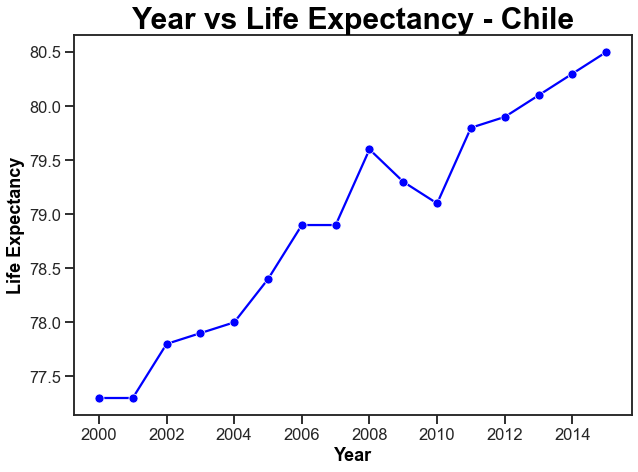

In [44]:
#plot Year against Life Expectancy for Chile
f,ax = plt.subplots(figsize = (10,7))
sns.lineplot(x = 'Year',y = 'Life_expectancy',data=chile,color='blue',marker='o')
sns.set_context('talk')
ax.set_ylabel('Life Expectancy',fontweight='semibold',color='black')
ax.set_title('Year vs Life Expectancy - Chile',fontsize=30,fontweight='semibold',color='black')
ax.set_xlabel('Year',fontweight='semibold',color='black')



Text(0.5, 0, 'Year')

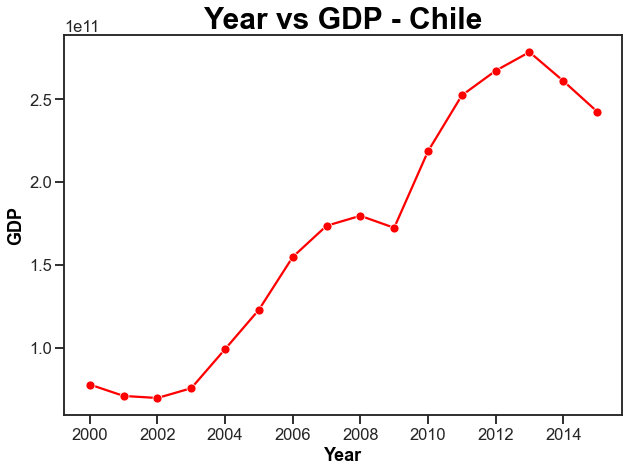

In [45]:
#plot Year against GDP for Chile
f,ax = plt.subplots(figsize = (10,7))
sns.lineplot(x= 'Year',y='GDP',data=chile,color='red',marker='o')
sns.set_context('talk')
ax.set_ylabel('GDP',fontweight='semibold',color='black')
ax.set_title('Year vs GDP - Chile',fontsize=30,fontweight='semibold',color='black')
ax.set_xlabel('Year',fontweight='semibold',color='black')


### I would like to carete a combo chart that displays the two line graphs on the same x-axis. Then , we will see if there's any patterns.

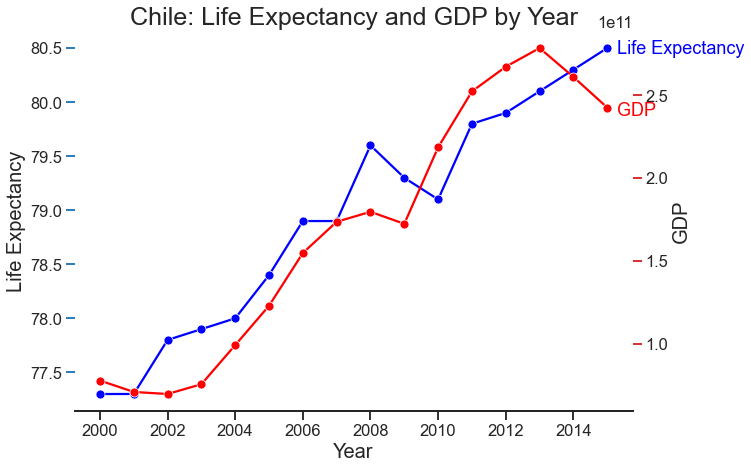

In [46]:
#create combo chart
fig,ax1 = plt.subplots(figsize = (10,7))
color = 'tab:blue'
#create the first line graph
sns.set_style('ticks')
sns.set_context('talk')
ax1.set_title('Chile: Life Expectancy and GDP by Year',fontsize =25)
ax1.set_xlabel('Year',fontsize=20)
ax1.set_ylabel('Life Expectancy',fontsize=20)
ax1 = sns.lineplot(x='Year',y='Life_expectancy',data = chile,color = 'blue',marker = 'o')
ax1.tick_params(axis='y',color=color)
plt.text(2015.3,80.45,'Life Expectancy',color='blue')
plt.text(2015.3,79.88,'GDP',color = 'red')
#specify we want to share the x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#create the second line graph
ax2.set_ylabel('GDP',fontsize=20)
ax2 = sns.lineplot(x='Year',y='GDP',data=chile,color='red',marker = 'o')
ax2.tick_params(axis='y', color=color)

sns.despine(right=True,left = True)



Conclusion: <br>
The combo graph indicates that GDP and life expectancy move upward at a similiar rate. As the GDP increases, the life expectancy increase. 

##  b. scatter plot with a regression line  of Chile 

As can be seen in the above graph, there is a positive correlation between GDP and life expectancy. In order to obtain statistical credibility on linearity, I would like to graph a linear equation between them. $r^2$ and p-value will be computed to see if its linearity is statistically significant.

Text(73000000000, 80.5, 'P value = 1.8659139746585596e-08 \nR squared = 0.9022656804696328')

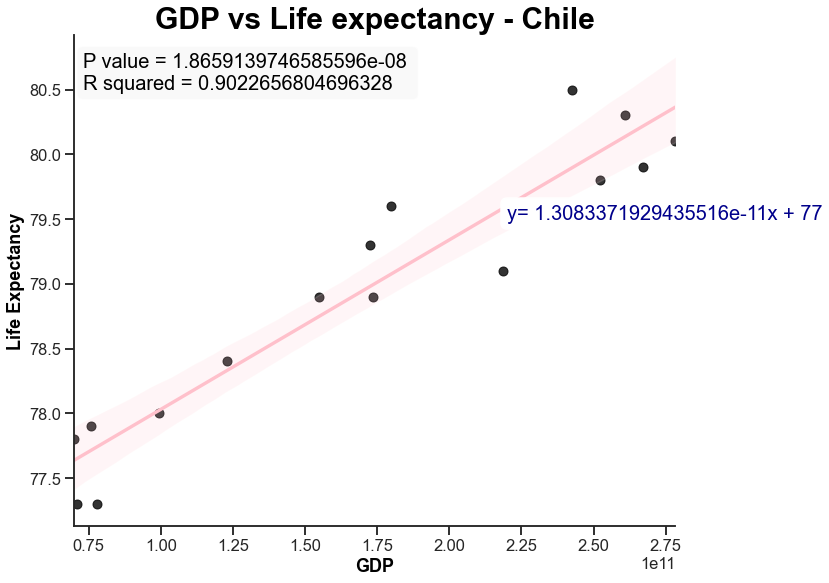

In [ ]:
#linear regression equation between GDP and Life expectancy for Chile
slope, intercept, r_value,p_value,std_err = stats.linregress(chile.GDP,chile.Life_expectancy)

#create text variables for linear equation, r and p-value
line_equation = f'y= {slope}x + {intercept:.0f}'
r_p_value = f"""P value = {p_value} 
R squared = {r_value**2}"""

#textbox properties
box1 = dict(boxstyle='round', facecolor='white', alpha=1)
box2 = dict(boxstyle='round', facecolor='whitesmoke', alpha=.5)


graph = sns.lmplot(data=chile,x='GDP',y='Life_expectancy',height = 8,aspect = 1.2,scatter_kws = {'color':'black'},line_kws = {'color':'pink'})
plt.ylabel('Life Expectancy',fontweight='semibold',color='black')
plt.title('GDP vs Life expectancy - Chile',fontsize=30,fontweight='semibold',color='black')
plt.xlabel('GDP',fontweight='semibold',color='black')
plt.text(220000000000,79.5,line_equation,fontsize=20,color='darkblue',bbox=box1)
plt.text(73000000000,80.5,r_p_value,fontsize=20,color='black',bbox=box2)

Conclusion: <br>
As expected, there's a pretty strong linearity between GDP and life expectancy for Chile. $r^2$ is 90.2%, indicating that 90.2% of the variation in life expectancy may be explained by GDP. if GDP increases by 1.0e+11 then, life expectancy will increase by around 1.3 years on average. Does this mean we all have to work harder to live longer!!??? 

<font size = 3.5> Now, I would like to extend my analysis to all six countries and their GDP and life expectancy relationships

## c. scatter plot with a regression line of GDP vs life expectancy of the six countries

In [19]:
#find average life expectancy and GDP by country
life_GDP_by_country = life_gdp.groupby('Country',as_index = False).agg({'GDP':"mean",'Life_expectancy': "mean"})

/Users/PJMoon/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(24200000000000, 50, 'P value = 0.4932 \nR squared = 0.1242')

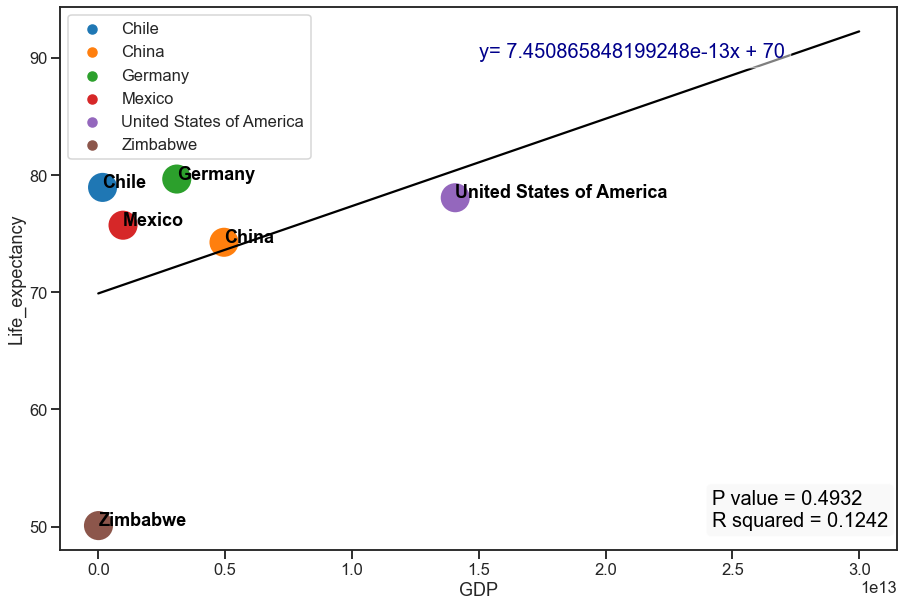

In [20]:
#linear regression equation between GDP and life expectancy for all six countries
slope, intercept, r_value,p_value,std_err = stats.linregress(life_GDP_by_country.GDP,life_GDP_by_country.Life_expectancy)

#create text variables for linear equation, r and p-value
line_equation = f'y= {slope}x + {intercept:.0f}'
r_p_value = f"""P value = {p_value:.4f} 
R squared = {r_value**2:.4f}"""

#create x
x = [*range(0,40000000000000,10000000000000)]
y = [x1*slope + intercept for x1 in x]


#textbox properties
box1 = dict(boxstyle='round', facecolor='white', alpha=.5)
box2 = dict(boxstyle='round', facecolor='whitesmoke', alpha=.5)

ax,fig = plt.subplots(figsize = (15,10))
pl = sns.scatterplot(data = life_GDP_by_country, x='GDP', y='Life_expectancy',hue='Country',s=1000)
sns.lineplot(x,y,color='black' )
for line in range(0,life_GDP_by_country.shape[0]):
    pl.text(life_GDP_by_country.GDP[line]+0.2,life_GDP_by_country.Life_expectancy[line],life_GDP_by_country.Country[line],horizontalalignment='left',size='medium',color='black',weight='semibold')
plt.text(15000000000000,90,line_equation,fontsize=20,color='darkblue',bbox=box1)
plt.text(24200000000000,50,r_p_value,fontsize=20,color='black',bbox=box2)

    

Conclusion: <br>
The above scatter plot does not show a strong linear relationship ($r^2$ is only 12.4%). I can construct a hypothesis that  two factors affected such result. <br><br> 1. GDP, Gross Domestic product, might not be a good variable to use since it is defined as the sum of each individual's income or production whereas life expectancy is defined as the average of each individual's life expectancy. I feel like this is not apple to apple. <br><br> 2. Zimbabwe looks like an outlier. <br><br> I will try to work around these two factors to find if its linearity improves.

## c. scatter plot of GDP per capita against life expectancy on average of the six countries
<font size = 3.5> I would like to use GDP per capita (GDP/population) instead of GDP

In [21]:
#create a column: population
life_GDP_by_country['population'] = [18730000,1393000000,83020000,126000000,328200000,14000000]

In [22]:
#craete a column: GDP per capita
life_GDP_by_country['GDP_per_capita'] = life_GDP_by_country['GDP']/life_GDP_by_country['population'] 

/Users/PJMoon/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(32000, 71, 'P value = 0.2768 \nR squared = 0.2835')

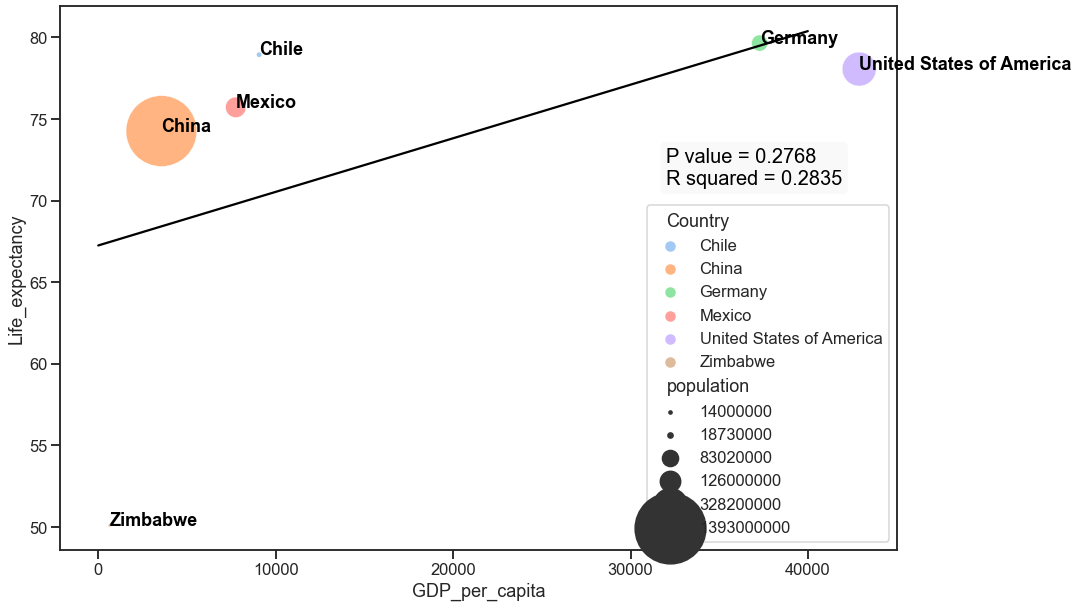

In [23]:
#plot GDP per capita against life_expectancy
slope, intercept, r_value,p_value,std_err = stats.linregress(life_GDP_by_country['GDP_per_capita'],life_GDP_by_country['Life_expectancy'])

#create text variables for linear equation, r and p-value
line_equation = f'y= {slope}x + {intercept:.0f}'
r_p_value = f"""P value = {p_value:.4f} 
R squared = {r_value**2:.4f}"""

#create x for linear equation
x = [*range(0,40000,10)]
y = [x1*slope + intercept for x1 in x]


ax,fig = plt.subplots(figsize = (15,10))
pl = sns.scatterplot(data = life_GDP_by_country, x='GDP_per_capita', y='Life_expectancy',hue='Country', size = 'population',sizes = (10,5000),palette = 'pastel')
sns.lineplot(x,y,color='black' )
for line in range(0,life_GDP_by_country.shape[0]):
    pl.text(life_GDP_by_country.GDP_per_capita[line]+0.2,life_GDP_by_country.Life_expectancy[line],life_GDP_by_country.Country[line],horizontalalignment='left',size='medium',color='black',weight='semibold')
#plt.text(20000,75,line_equation,fontsize=20,color='darkblue',bbox=box1)
plt.text(32000,71,r_p_value,fontsize=20,color='black',bbox=box2)  

Conclusion: <br> Visually, there's not much improvement from the previous graph. However, $r^2$ and p-value were increased a lot. How about taking out Zimbabwe from the dataset.

## d. Scatter plot of GDP against life expectancy on average of the six countries minus Zimbabwe

In [24]:
#Select data without Zimbabwe 
life_GDP_by_country2 = life_GDP_by_country[life_GDP_by_country['Country'].isin(['Zimbabwe']) == False ]

In [25]:
#display data
life_GDP_by_country2

,Country,GDP,Life_expectancy,population,GDP_per_capita
0,Chile,1.697888e+11,78.94375,18730000,9065.074480
1,China,4.957714e+12,74.26250,1393000000,3559.019203
2,Germany,3.094776e+12,79.65625,83020000,37277.470790
3,Mexico,9.766506e+11,75.71875,126000000,7751.195437
4,United States of America,1.407500e+13,78.06250,328200000,42885.435710


/Users/PJMoon/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(22000, 74.1, 'P value = 0.2310 \nR squared = 0.428')

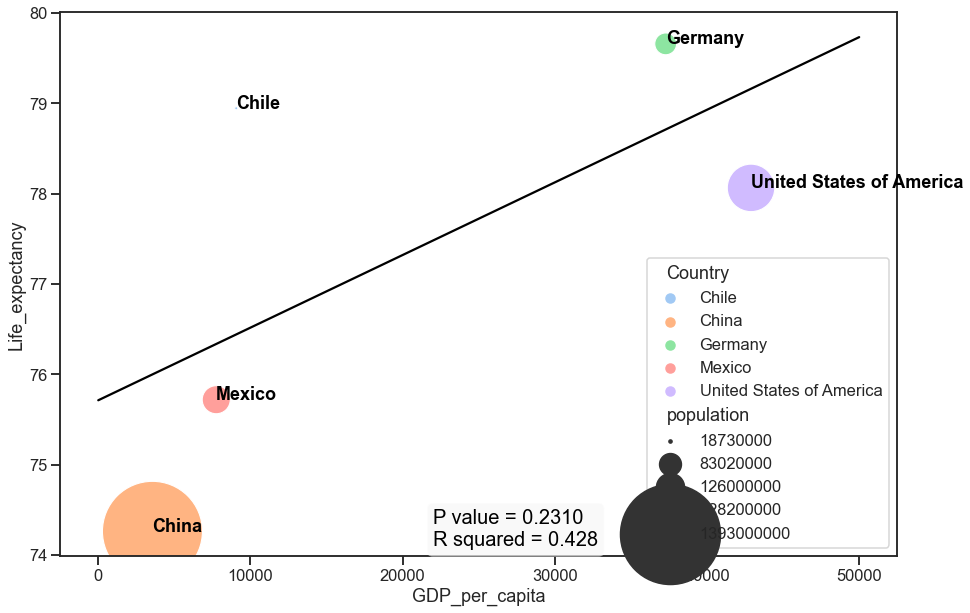

In [26]:
#plot GDP against life_expectancy
slope, intercept, r_value,p_value,std_err = stats.linregress(life_GDP_by_country2.GDP_per_capita,life_GDP_by_country2.Life_expectancy)

#create text variables for line equation, r and p-value
line_equation = f'y= {slope}x + {intercept:.0f}'
r_p_value = f"""P value = {p_value:.4f} 
R squared = {r_value**2:.3f}"""

#create x for linear equation
x = [*range(0,50000,10)]
y = [x1*slope + intercept for x1 in x]
ax,fig = plt.subplots(figsize = (15,10))
pl = sns.scatterplot(data = life_GDP_by_country2, x='GDP_per_capita', y='Life_expectancy',hue='Country', size = 'population',sizes = (10,10000),palette = 'pastel')
sns.lineplot(x,y,color='black' )
for line in range(0,life_GDP_by_country2.shape[0]):
    pl.text(life_GDP_by_country2.GDP_per_capita[line]+0.2,life_GDP_by_country.Life_expectancy[line],life_GDP_by_country.Country[line],horizontalalignment='left',size='medium',color='black',weight='semibold')

plt.text(22000,74.1,r_p_value,fontsize=20,color='black',bbox=box2)  

Conclusion: <br>
Finally, a stronger positivie linear relationship is more apparent visually and statistically! From my analysis, Zimbabwe data is distant from 5 other countries in terms of life expactany based on its GDP. We can expect that compared to other countries with similar GDPs, Zimbabwe's life expectancy will be relatively low. This indicates that Zimbabwe might need more aid from non-profit organizations to help them catch up with the rest of the world!  
    
Further research on 'between continents' would be interesting and informative.